**Diana Laura Equihua Díaz 19020088**  
**Salma Almazan Barajas 19020078**  
*INTELIGENGIA ARTIFICIAL*  
*UNIDAD 2:_ EJERCICIO PRÁCTICO*



- Como primer paso, se realizará la importación de las librearias correspondinetes para que funcione correctamente.

### Conjunto de datos

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


- Como siguiente paso, se debe cargar de los datos dentro de la libreta y se asignan a una variable llamada data y se le proporcciona un nombre a cada columna. 

In [ ]:
mipath = "australian.dat"
data = pd.read_csv(mipath,sep=" ",header=None)
data.columns = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","class"]
data.head(5)

- Usamos la funcion info para ver la información de los datos que tiene el conjunto de datos que se importo.

In [ ]:
data.info()

- Ahora una vez cargado los datos se realiza la separacion de los datos con la tarjet. 

In [7]:
X = data.iloc[:,:-1]#Todas las calumnas menos la class
y = data[["class"]] #Se selecciona la columna class 

- Se realiza la separaion de los datos para el entrenamiento y la prueba. 

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.6,random_state=45)

### Random forest (bosque aleatorio)

- Para poder utilizar el modelo de bosque aleatorio, se tiene que importar su libreria. 

In [10]:
from sklearn.ensemble import RandomForestClassifier

- Despues se crea el modelo base y se corre dentro de un ciclo for.


In [ ]:
n_for = 10
accAD = list() #Se define la variable que quedará los resultados obtenidos en cada ciclo 

for k in range(n_for):
    modelo_AD =  RandomForestClassifier()
    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test, y_test)
    accAD.append(tmp)
    
print('El Arbol de desición con parámetros por default')
print('Promedio y desviación estándar:  %.1f (%.1f)' % (100*np.mean(accAD),100*np.std(accAD)))

pd.DataFrame(accAD).boxplot()
plt.show()

-Ahora se realizará un ciclo for para el modelo con hiperparametros.


In [ ]:
n_for = 10
accAD2 = list() #Se define la variable que quedará los resultados obtenidos en cada ciclo 

for k in range(n_for):
    modelo_AD =  RandomForestClassifier(n_estimators=100, # número de árboles aleatorios a generar para el bosque.
                                        criterion="gini", # función que se mide la calidad de cada división en cada nodo.
                                        max_depth=None, # profundidad máxima de cada árbol.
                                        min_samples_split=2, # mínimo de datos que debe haber en un nodo para continuar dividiéndolo.
                                        min_samples_leaf=1, # mínimo de datos que deben quedar en cada hoja después de cada división.
                                        max_features=12) # máximo de variables a seleccionar aleatoriamente en cada árbol del bosque.)
    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test, y_test)
    accAD2.append(tmp)
    
print('El Arbol de desición con parámetros por default')
print('Promedio y desviación estándar:  %.1f (%.1f)' % (100*np.mean(accAD2),100*np.std(accAD2)))

pd.DataFrame(accAD2).boxplot()
plt.show()

-Se grafican los dos modelos en un boxplot.

In [23]:
ddff= pd.DataFrame(list(zip(accAD,accAD2)),columns=["default","ajustado"])
ddff

,default,ajustado
0,0.880435,0.905797
1,0.884058,0.894928
2,0.887681,0.902174
3,0.880435,0.894928
4,0.887681,0.902174
5,0.880435,0.891304
6,0.884058,0.898551
7,0.873188,0.898551
8,0.880435,0.909420
9,0.887681,0.891304


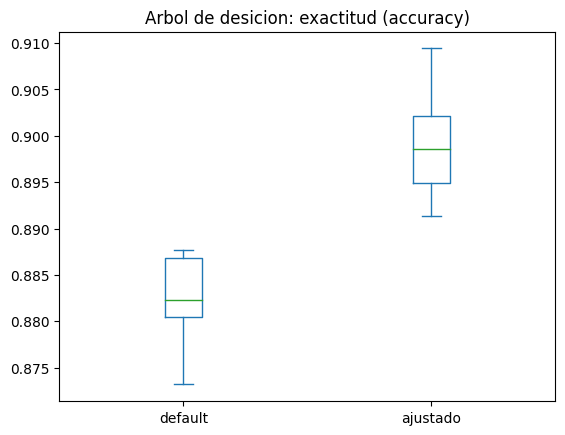

In [15]:
ddff.plot(kind='box')
plt.title('Arbol de desicion: exactitud (accuracy)')
plt.show()

**¿Qué modelo arroja mejores scores?**
El modelo que agorro los mejores datos son el modelo que tiene hiperparametros, ya que este muestra el scrore arriba del 0.890 mientras que el modelo base arroja solo el arroja el score de 0.890 hacia abajo 


### Linear Support Vector Classifier (LinearSVC)


- Se importa la libreria que necesita el modelo para funcionar 

In [19]:
from sklearn.svm import LinearSVC

- Una vez realizad esto, se crea el modelo base y se corre dentro de un ciclo for.

In [ ]:
n_for = 10
accAD3 = list() #Se define la variable que quedará los resultados obtenidos en cada ciclo 

for k in range(n_for):
    modelo_AD =  LinearSVC()
    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test, y_test)
    accAD3.append(tmp)
    
print('El Arbol de desición con parámetros por default')
print('Promedio y desviación estándar:  %.1f (%.1f)' % (100*np.mean(accAD3),100*np.std(accAD3)))

pd.DataFrame(accAD3).boxplot()
plt.show()

- Ahora se realizará un ciclo for para el mismo modelo pero ahora con hiperparametros.

In [ ]:
n_for = 10
accAD4 = list() #Se define la variable que quedará los resultados obtenidos en cada ciclo 

for k in range(n_for):
    modelo_AD =  LinearSVC(C= 0.1,
                            penalty = "l1",
                            dual=False)
    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test, y_test)
    accAD4.append(tmp)
    
print('El Arbol de desición con parámetros por default')
print('Promedio y desviación estándar:  %.1f (%.1f)' % (100*np.mean(accAD4),100*np.std(accAD4)))

pd.DataFrame(accAD4).boxplot()
plt.show()

-Se grafican los dos modelos en un boxplot.

In [ ]:
ddff2= pd.DataFrame(list(zip(accAD3,accAD4)),columns=["default","ajustado"])
ddff2

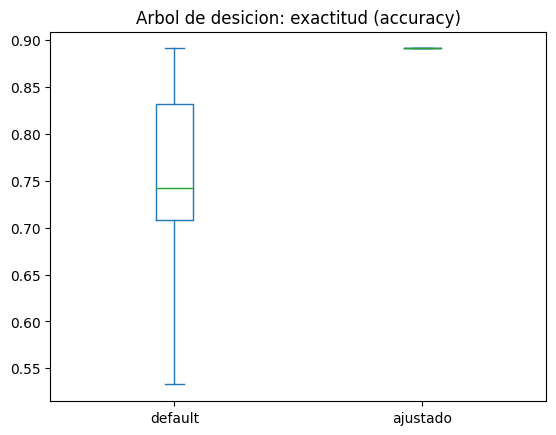

In [26]:
ddff2.plot(kind='box')
plt.title('Arbol de desicion: exactitud (accuracy)')
plt.show()

**¿Qué modelo arroja mejores scores?**  
Como se muestran los resultados el modelo que arroja mejores resultadis en cuanto el score es el modelo que tiene los hiperparametros aunque estan concentrados los datos en el score de 0.90